# TSP using SMO
##### Niloufar Babaahmadi 610398103 HW7

In this problem, we attempt to solve TSP using Self-Organizing Map. How does it work? It's simple; first of all create random points and then update the neurons according to the SOM algorithm. All neurons are updated with different weights using the neighborhood function which determines how the winner neuron influences the others on the adaptive process (Here gaussian function was used). In short; we find the winner neuron and the winner neuron and its neighborhood are updated using the neighborhood function.

In [ ]:
import numpy as np
from sys import argv
import pandas as pd
import matplotlib as plt
import random
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl

Read the input and create a data frame from it. (data frames are more convenient and easier to utilize.)

In [ ]:
def inp_reader(path):
    
    global size 
    
    file = open(path)
    inp = file.read()
    file.close()
    
    line = inp.split('\n')
    size = len(line) - 1
    
    df = pd.DataFrame(columns =['x', 'y'])  
    
    x_helper = []
    y_helper = []
        
    for i in range(size):
        
        elements = line[i].split()
        
        x_helper.append(elements[1])
        y_helper.append(elements[2])
    
    df['x'] = x_helper
    df['y'] = y_helper
    
    df = df.astype({"x": float, "y": float})
    
    return df

In [ ]:
inp_reader("1.tsp")

,x,y
0,1150.0,1760.0
1,630.0,1660.0
2,40.0,2090.0
3,750.0,1100.0
4,750.0,2030.0
5,1030.0,2070.0
6,1650.0,650.0
7,1490.0,1630.0
8,790.0,2260.0
9,710.0,1310.0


Generate a neuron network of considering the size and create a two-dimensional points vector.

In [ ]:
def networkGen(s):
  
    return np.random.rand(s, 2)

Find the closest candidate to a city.

In [ ]:
def closest_cities(candidates, origin):
    
    return distance(candidates, origin).argmin()

calculate the distances of two points in numpy arrays 

In [ ]:
def distance(a, b):
    
    ans = 0 
    ans = np.sqrt(np.sum((a - b) ** 2, axis=1))
    
    return ans

Return the cost of the route.

In [ ]:
def route_cost(cities):
    
    points = cities[['x', 'y']]
    dist = distance(points, np.roll(points, 1, axis=0))
    
    return np.sum(dist)

The gaussian function of a given radius around a center point.

In [ ]:
def get_neighborhood(center, radius, domain):

    if radius < 1: # to avoid blocks, we will put an upper bound on the radix
        
        radius = 1

    deltas = np.absolute(center - np.arange(domain)) # Compute the circular network distance to the center
    distances = np.minimum(deltas, domain - deltas)

    # Compute Gaussian distribution around the given center
    return np.exp(-(distances*distances) / (2*(radius*radius)))

Plot the problem

In [ ]:
def plot1(cities, neurons):

    fig = plt.figure(figsize=(5, 5), frameon = False)
    axis = fig.add_axes([0,0,1,1])

    axis.set_aspect('equal', adjustable='datalim')
    plt.axis('off')

    axis.scatter(cities['x'], cities['y'], color='deeppink', s=4)
    axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='deepskyblue', markersize=2)

    plt.show()
    plt.close()

Plot the resulting route.

In [ ]:
def plot2(cities, route):
        
    fig = plt.figure(figsize=(5, 5), frameon = False)
    axis = fig.add_axes([0,0,1,1])

    axis.set_aspect('equal', adjustable='datalim')
    plt.axis('off')

    axis.scatter(cities['x'], cities['y'], color='salmon', s=4)
    route = cities.reindex(route)
    route.loc[route.shape[0]] = route.iloc[0]
    axis.plot(route['x'], route['y'], color='black', linewidth=1)

    plt.show()
    plt.close()

the route that a network found.

In [ ]:
def get_route(cities, network):
    
    cities['winner'] = cities[['x', 'y']].apply(lambda x: closest_cities(network, x), axis=1, raw=True)

    return cities.sort_values('winner').index


SOM implementation

In [ ]:
def som(inp, it, learning_rate):
    
    global size 
    
    cities = inp
    
    n = size * 10 #I tried different network sizes and realized that; the bigger the n, the better the answer. However,
                    #there is a downside to it and for bigger network sizes, the overal program takes longer to function.
    network = networkGen(n) #generating the networks

    for i in range(it): # the iteration's ideal amount differs from problem to problem, however; the bigger it is the
                        #the better results are found

        city = cities.sample(1)[['x', 'y']].values #random city
        winner = closest_cities(network, city) #find the winner
        
        gaussian = get_neighborhood(winner, n//10, network.shape[0]) # determine how the winner neuron influences 
                                                                        #the others on the adaptive process
        
        network += gaussian[:,np.newaxis] * learning_rate * (city - network) # Update the network's weights 
        
        
        learning_rate = learning_rate * 0.9 #slow down the learning process and decrease the parameters
        n = n * 0.9

        if not i % 1000: #plot the cities and networks
            
            plot1(cities, network)

        if n < 1: #if precceded the stopping condition
            
            print('finished process at:', end = ' ')
            print(i)
            break
            
        if learning_rate < 0.001: #if precceded the stopping condition
            
            print('finished process at:', end = ' ')
            print(i)
            break
            
    else:
        
        print('Completed the iterations without having the parameters decay')

    plot1(cities, network)

    route = get_route(cities, network)
    plot2(cities, route)
    
    return route

In [ ]:
def main(path, it, learning_rate):

    inp = inp_reader(path)
    route = som(inp, it, learning_rate)
    
    inp = inp.reindex(route) #because storage parameter has been altered and we rearrange it as shown
    print(inp)
    
    distance = route_cost(inp)

    print('len route =', end = ' ')
    print((distance))


### First test case

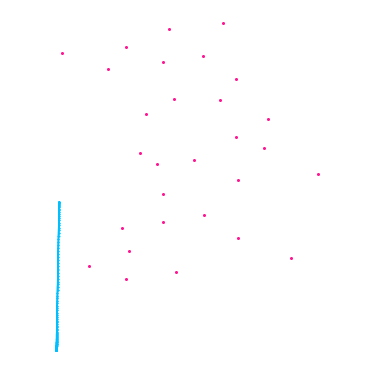

Completed the iterations without having the parameters decay


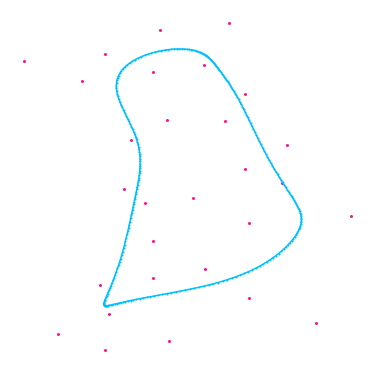

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


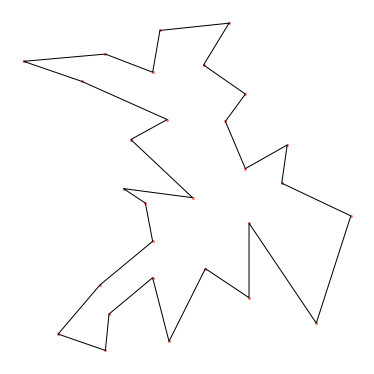

         x       y  winner
11  1170.0  2300.0       8
5   1030.0  2070.0      14
27  1260.0  1910.0      45
0   1150.0  1760.0      50
23  1260.0  1500.0      65
7   1490.0  1630.0      65
26  1460.0  1420.0      74
22  1840.0  1240.0      93
6   1650.0   650.0     113
15  1280.0  1200.0     113
24  1280.0   790.0     122
18  1040.0   950.0     129
10   840.0   550.0     139
14   750.0   900.0     141
13   510.0   700.0     161
21   490.0   500.0     163
16   230.0   590.0     167
17   460.0   860.0     180
3    750.0  1100.0     198
9    710.0  1310.0     209
19   590.0  1390.0     213
12   970.0  1340.0     215
1    630.0  1660.0     236
20   830.0  1770.0     238
28   360.0  1980.0     256
2     40.0  2090.0     257
25   490.0  2130.0     262
4    750.0  2030.0     271
8    790.0  2260.0     276
len route = 9859.462567336568


In [ ]:
main("1.tsp", 1000, 0.5)

As you see, the iteration got completed before reaching learning rate stopping condition so by setting a higher iteration, we may get better results. (we continue to alter the iteration until the desired result is reached.) also, a higher learning rate grants better results.

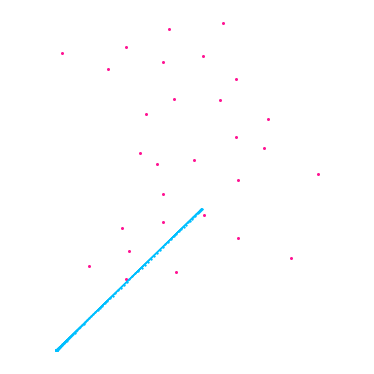

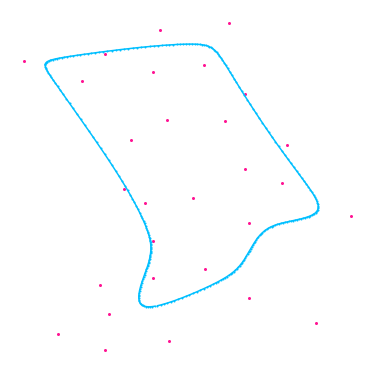

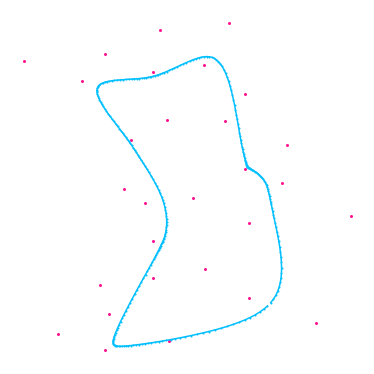

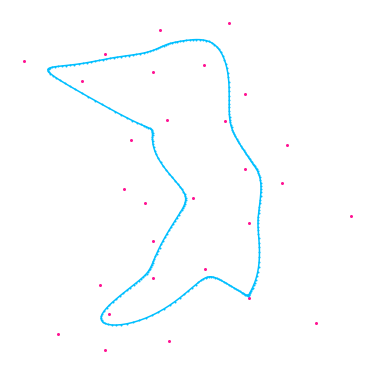

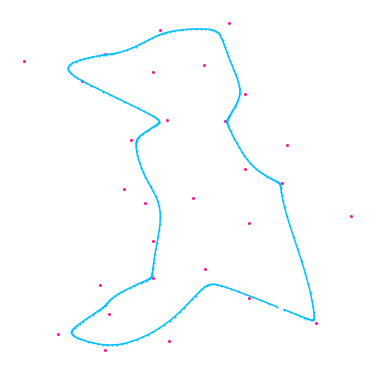

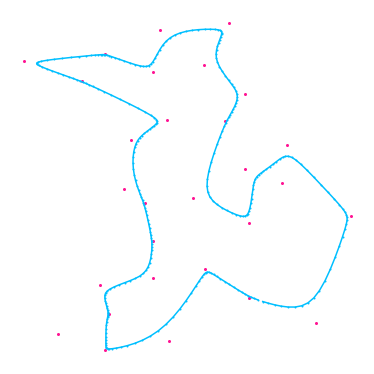

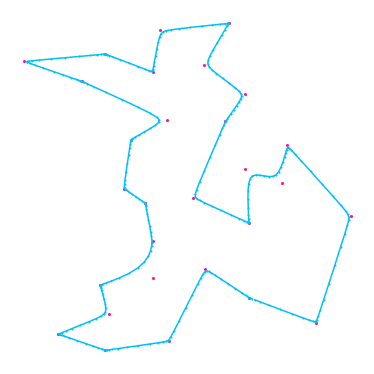

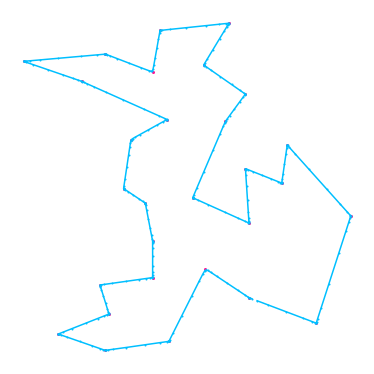

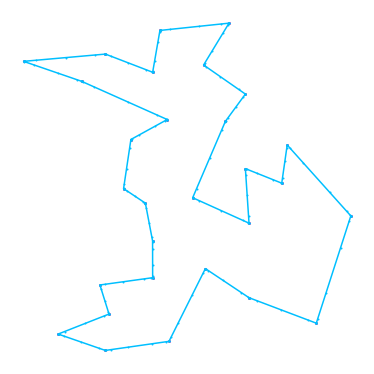

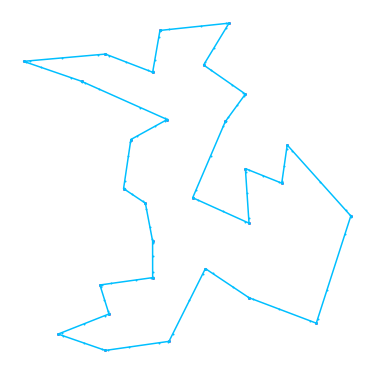

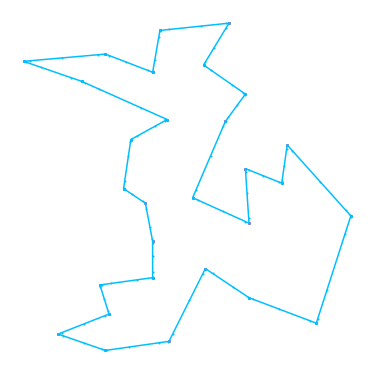

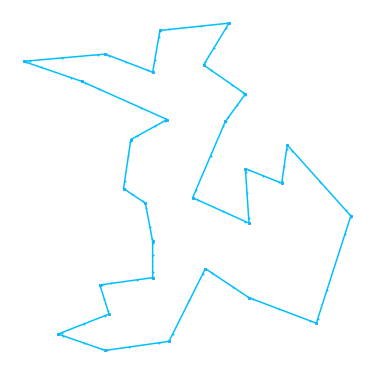

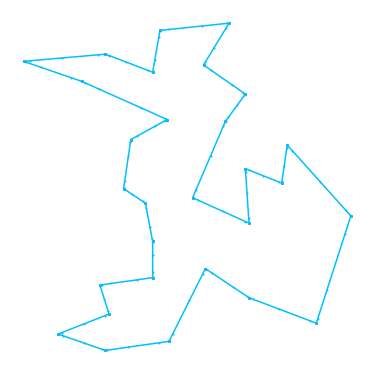

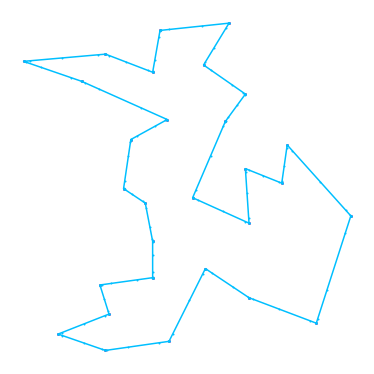

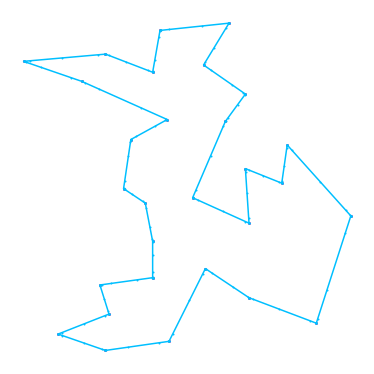

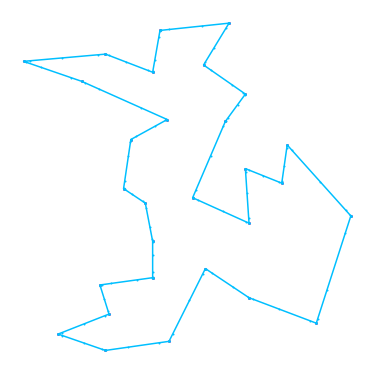

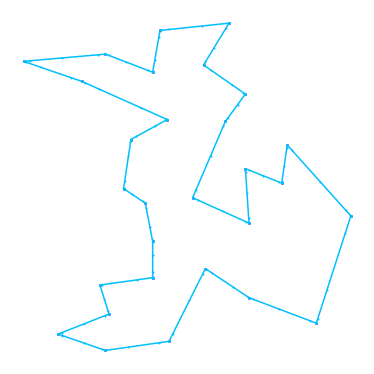

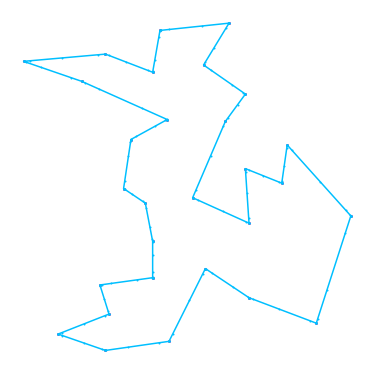

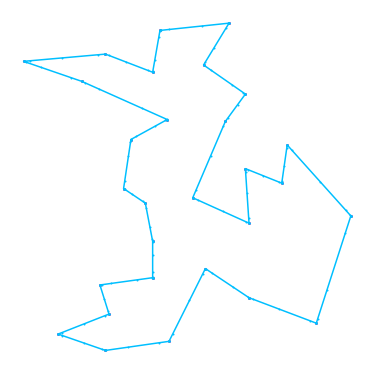

finished process at: 18896


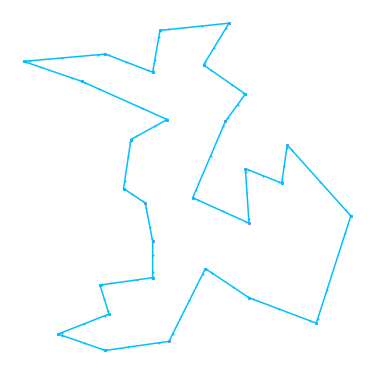

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


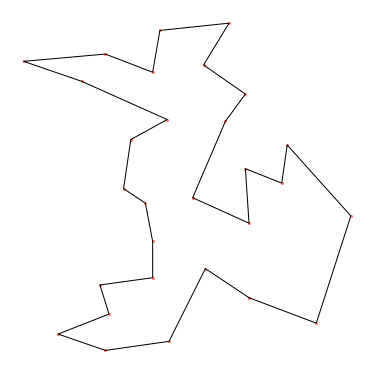

         x       y  winner
24  1280.0   790.0       2
18  1040.0   950.0      12
10   840.0   550.0      22
21   490.0   500.0      31
16   230.0   590.0      42
13   510.0   700.0      52
17   460.0   860.0      61
14   750.0   900.0      71
3    750.0  1100.0      81
9    710.0  1310.0      91
19   590.0  1390.0     101
1    630.0  1660.0     111
20   830.0  1770.0     121
28   360.0  1980.0     131
2     40.0  2090.0     141
25   490.0  2130.0     151
4    750.0  2030.0     161
8    790.0  2260.0     171
11  1170.0  2300.0     181
5   1030.0  2070.0     192
27  1260.0  1910.0     202
0   1150.0  1760.0     211
12   970.0  1340.0     221
15  1280.0  1200.0     231
23  1260.0  1500.0     241
26  1460.0  1420.0     251
7   1490.0  1630.0     261
22  1840.0  1240.0     272
6   1650.0   650.0     282
len route = 9184.016252007743


In [ ]:
main("1.tsp", 1000000, 0.7)

As you see we reached better results by having the parameters decay completly. But it will take ages to complete. :)

### Second test case

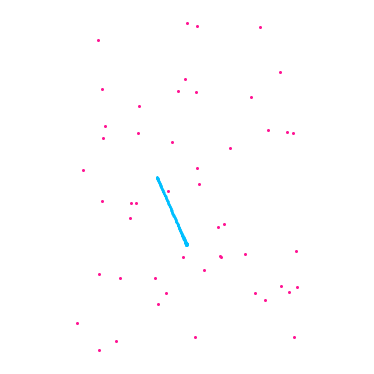

Completed the iterations without having the parameters decay


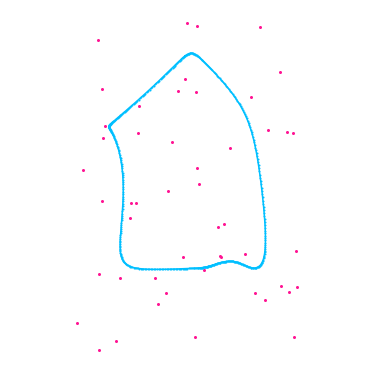

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


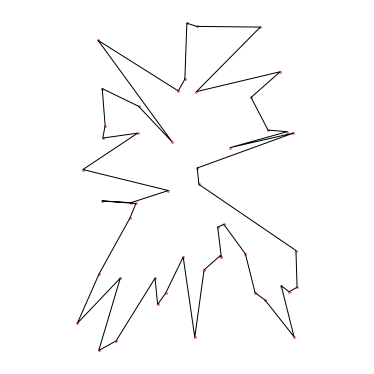

       x      y  winner
32  -0.8  148.3      14
40  -6.7  137.7      22
30 -78.5  183.0      36
36 -12.2   92.1      43
23 -42.3  124.0      44
12 -74.8  139.8      55
4  -72.2  106.7      91
47 -74.3   95.5     114
11 -43.1   99.9     125
33 -92.1   67.3     139
41 -15.6   48.5     150
26 -49.1   37.6     155
28 -74.7   39.2     155
39 -44.6   36.9     156
0  -50.0   23.8     162
29 -77.5  -25.9     188
15 -97.1  -70.4     194
2  -58.6  -29.9     196
8  -77.9  -94.7     199
48 -62.5  -86.3     202
42 -27.5  -30.0     218
37 -25.2  -53.5     219
20 -18.1  -43.6     224
25  -2.3  -11.0     237
22   8.1  -82.9     244
9   16.4  -22.6     262
13  30.8   -9.9     303
49  31.9  -11.3     305
16  28.6   15.7     307
7   34.1   18.2     313
5   53.4   -8.2     339
46  62.1  -42.9     361
14  71.1  -49.7     364
10  97.0  -82.5     366
18  85.5  -36.7     370
17  92.6  -42.2     370
34  99.7  -38.1     372
21  98.7   -5.2     384
1   11.8   54.0     410
24  10.3   68.7     415
6   96.5  100.0 

In [ ]:
main("2.tsp", 1000, 0.6)

### Third test case

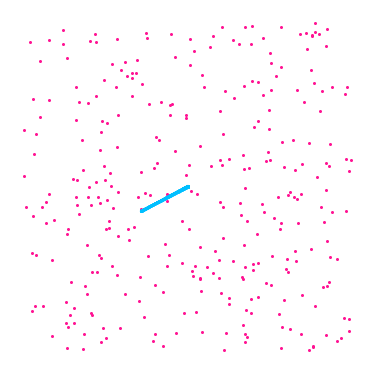

Completed the iterations without having the parameters decay


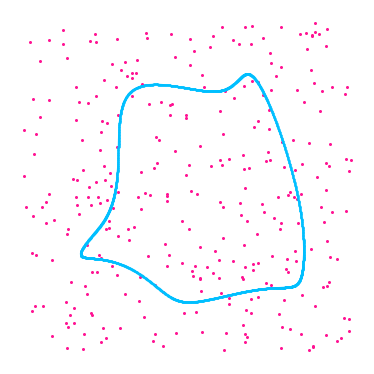

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


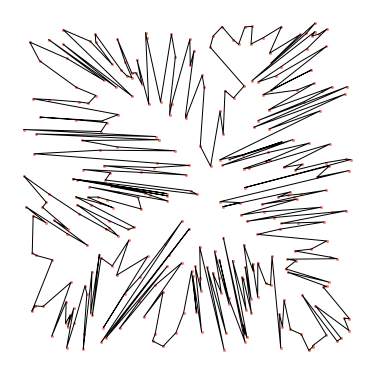

         x     y  winner
301  -98.7 -51.5       0
272 -131.0 -33.4      35
106 -168.1  -8.9      68
221 -198.0  12.5      86
11  -171.0 -19.3     118
..     ...   ...     ...
169  -71.7 -52.0    3147
76   -95.3 -41.3    3157
121 -133.8 -22.2    3184
0    -94.9 -49.8    3192
270  -84.2 -59.9    3202

[321 rows x 3 columns]
len route = 15156.190305357843


In [ ]:
main("3.tsp", 1000, 0.6)

awful results... let's alter the parameters.

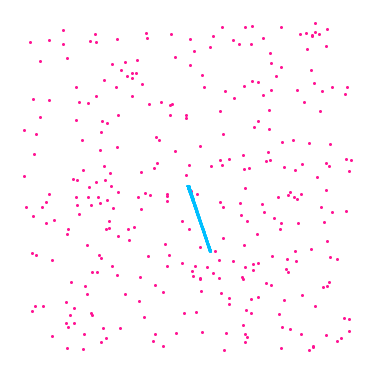

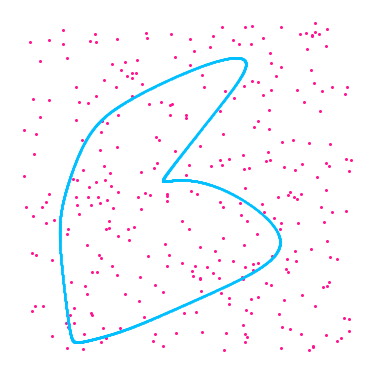

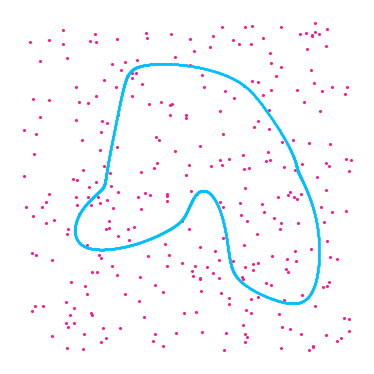

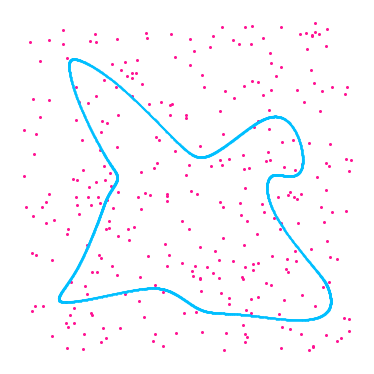

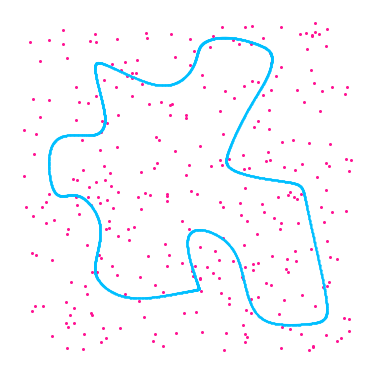

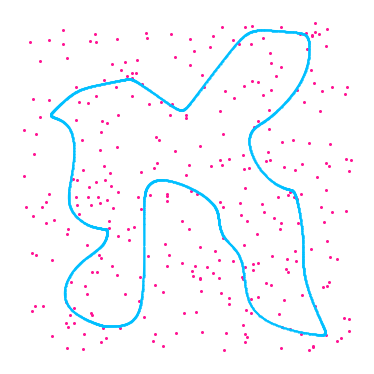

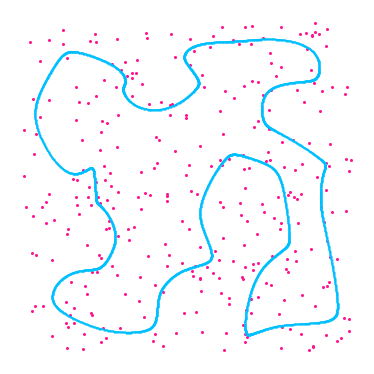

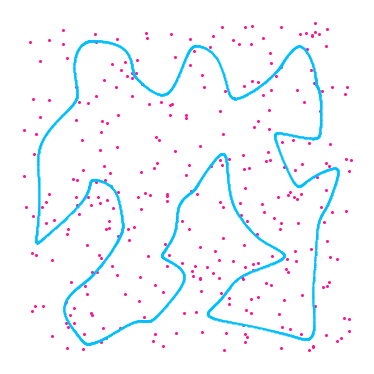

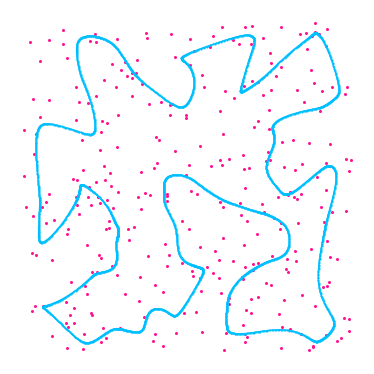

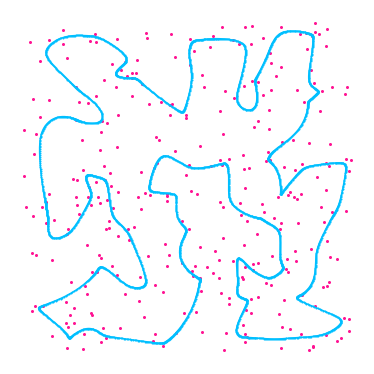

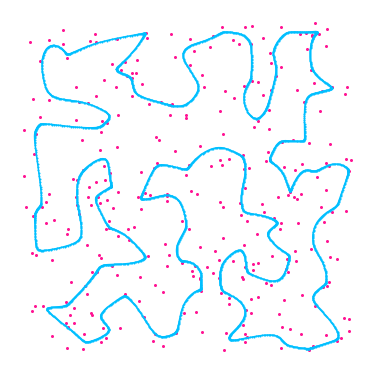

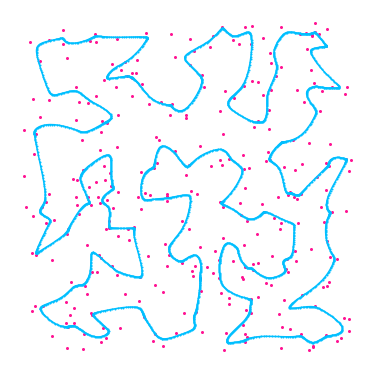

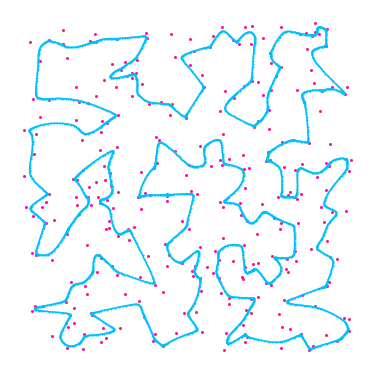

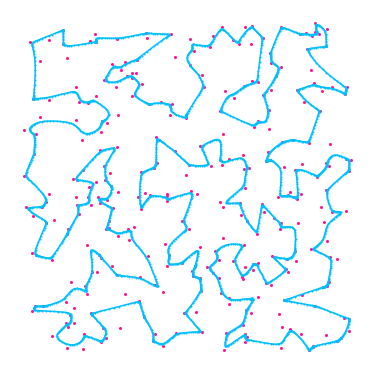

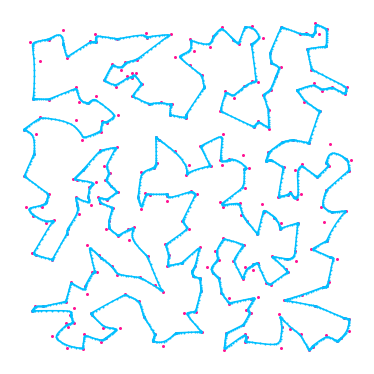

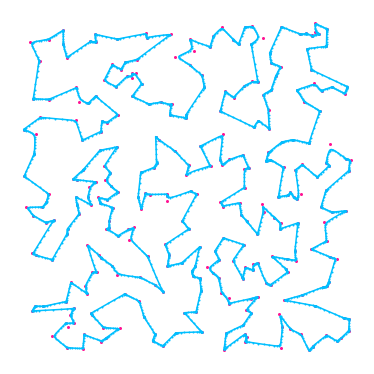

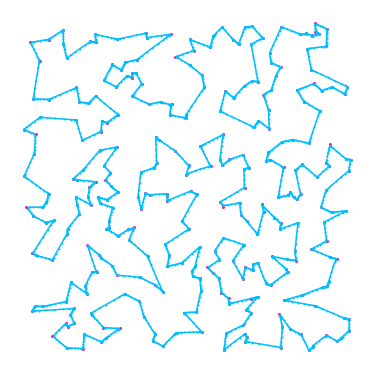

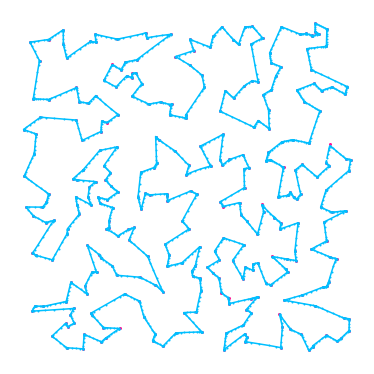

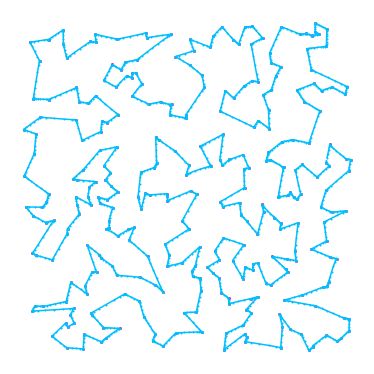

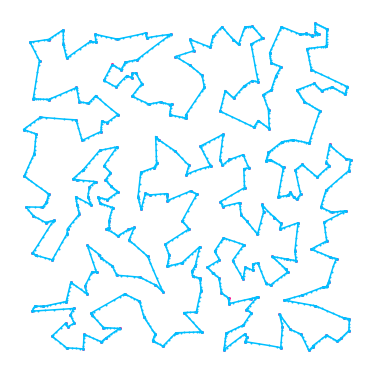

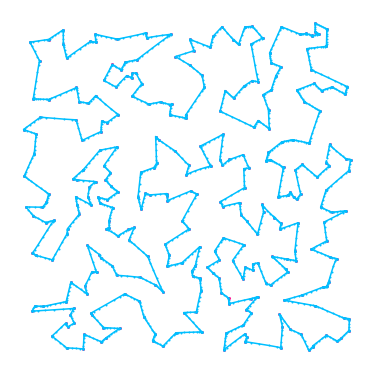

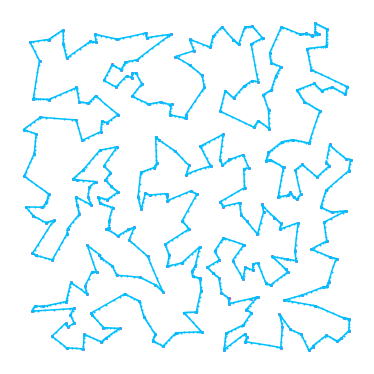

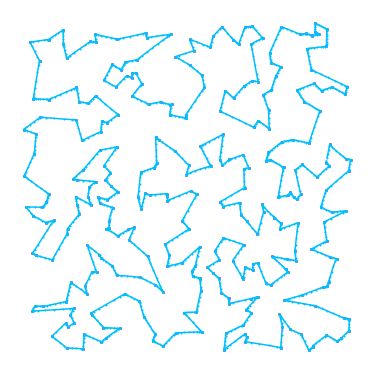

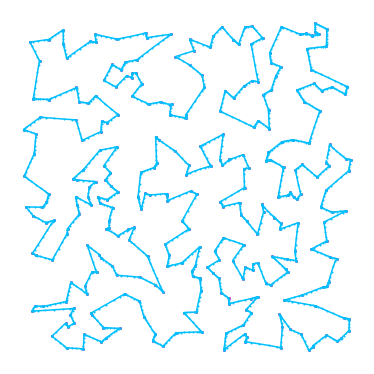

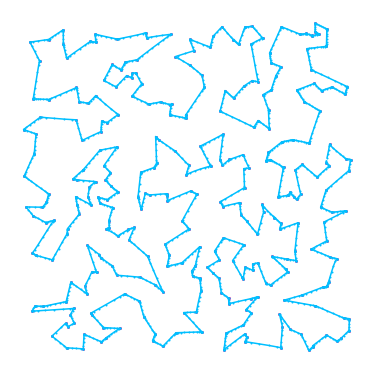

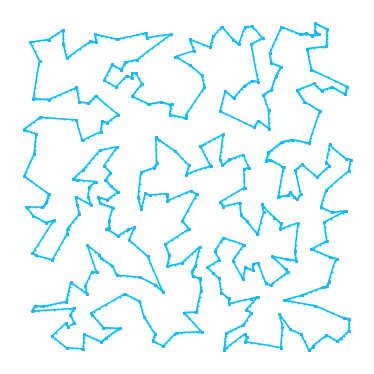

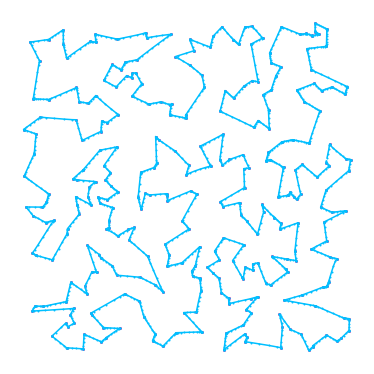

finished process at: 26909


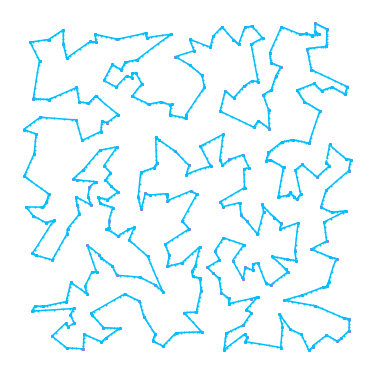

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


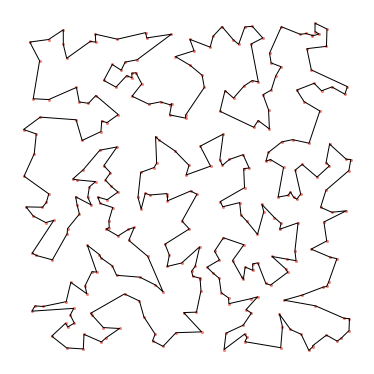

         x     y  winner
18   171.9  51.4       5
188  192.0  33.1      15
257  197.6  32.7      23
94   195.2  19.3      33
269  167.5  -4.5      46
..     ...   ...     ...
51   130.3  19.9    3164
30   138.7  26.8    3173
218  156.7  11.4    3185
259  171.7  25.1    3198
182  167.6  29.0    3206

[321 rows x 3 columns]
len route = 5813.3030208593555


In [ ]:
main("3.tsp", 1000000, 0.7)

As you see, we got better results.

### Best Iran summer vacation
###### I decided to impliment my algorithm on cities of iran to find the best travel route and decided to share my results here. :))
###### Source: https://simplemaps.com/data/ir-cities

In [ ]:
global size 

df_inp = pd.read_csv('ir.csv')

#print(df_inp) 
    
df = pd.DataFrame(columns =['x', 'y'])  
    
x_helper = []
y_helper = []

size = 415
        
for i in range(1, 415):

    df['x'] = df_inp['lat']
    df['y'] = df_inp['lng']
    
    df = df.astype({"x": float, "y": float})
    
print(df)

           x        y
0    35.7000  51.4167
1    36.3069  59.6042
2    32.6447  51.6675
3    35.8327  50.9915
4    38.0833  46.2833
..       ...      ...
410  33.8603  58.5217
411  31.2656  56.8056
412  31.5419  60.0364
413  33.5959  56.9244
414  32.8601  53.0875

[415 rows x 2 columns]


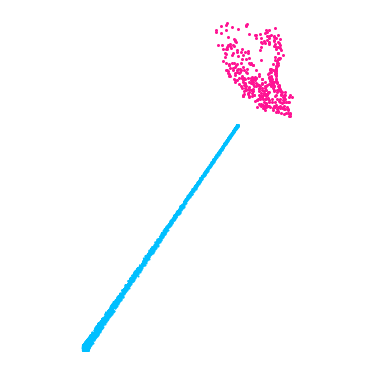

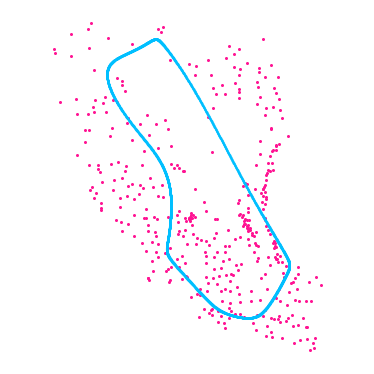

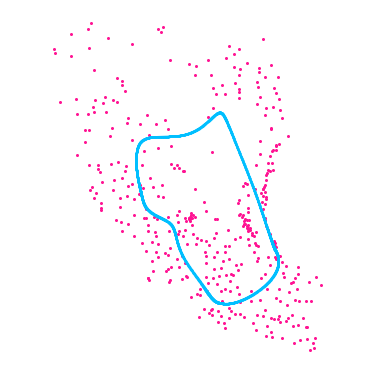

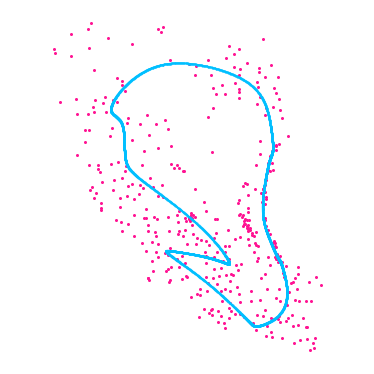

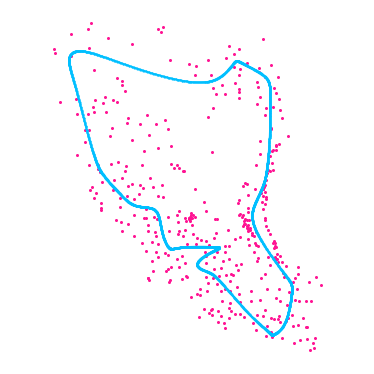

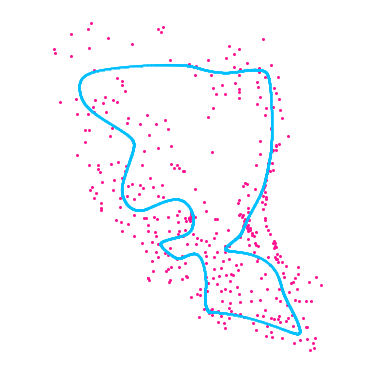

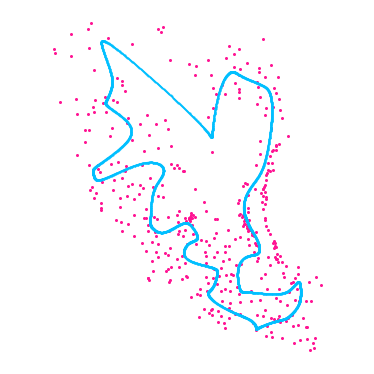

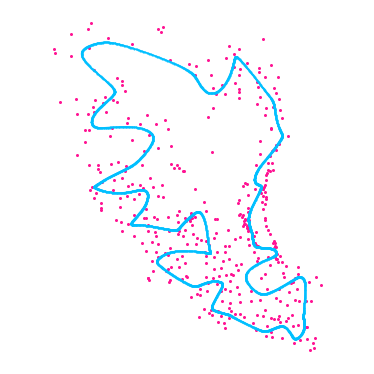

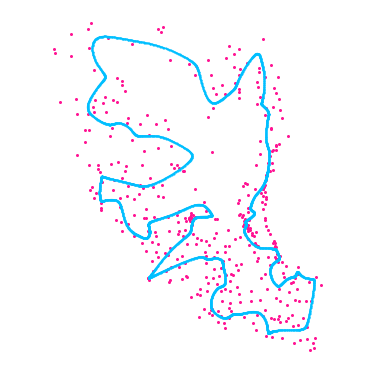

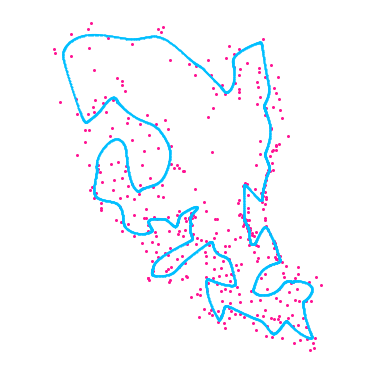

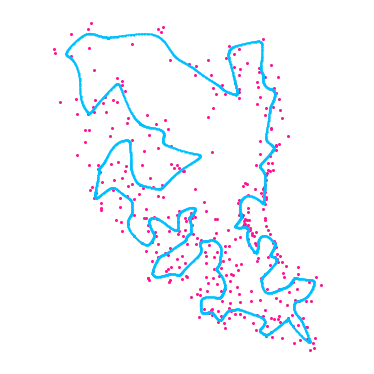

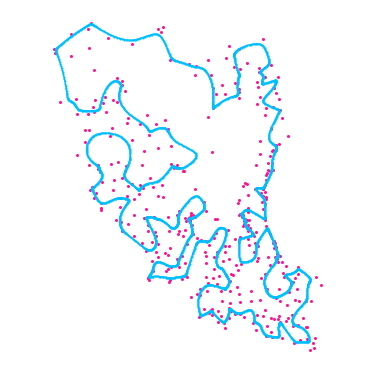

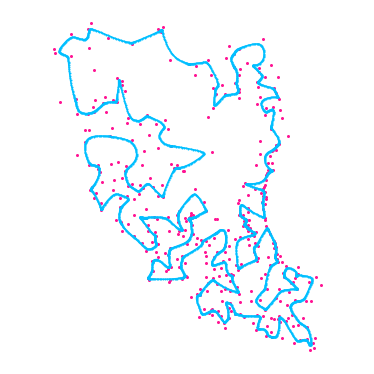

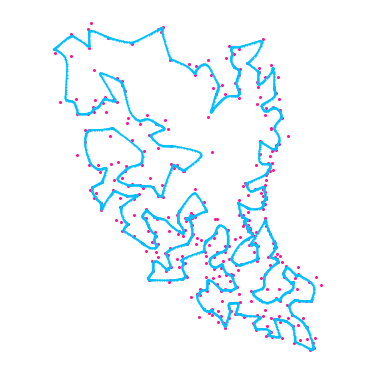

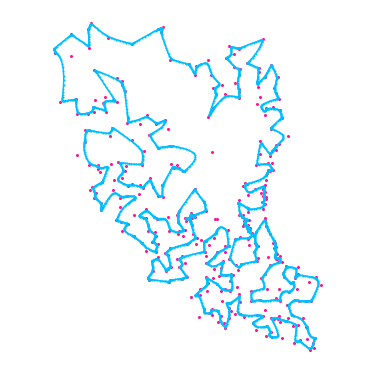

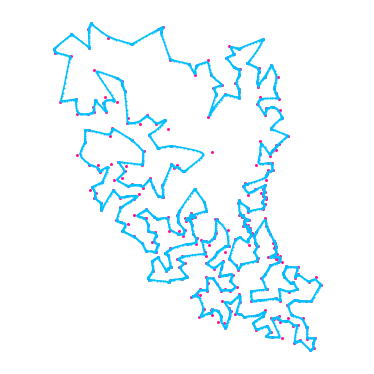

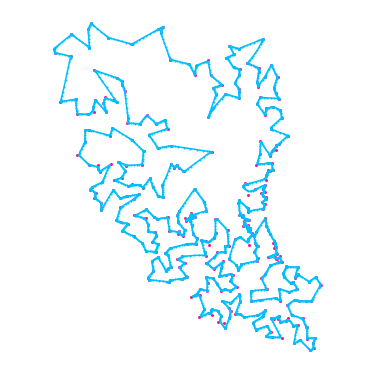

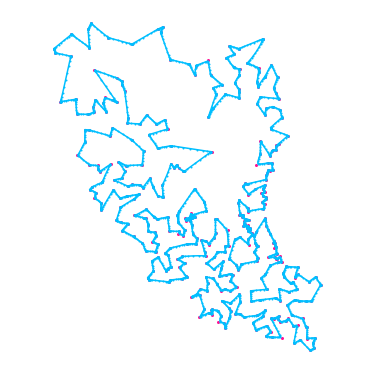

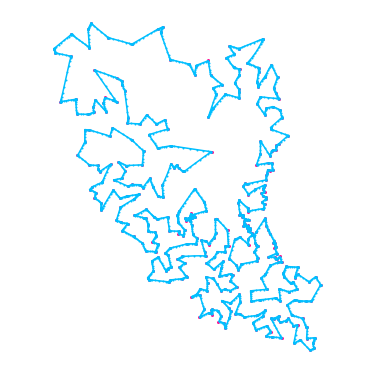

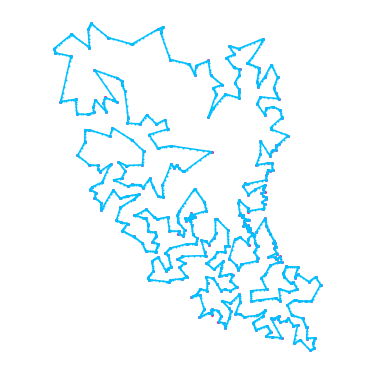

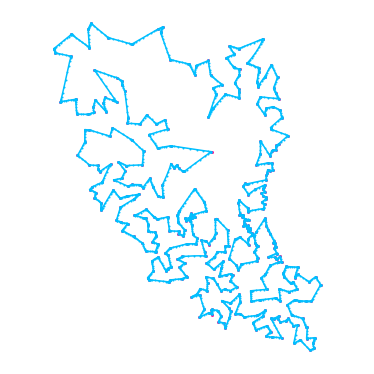

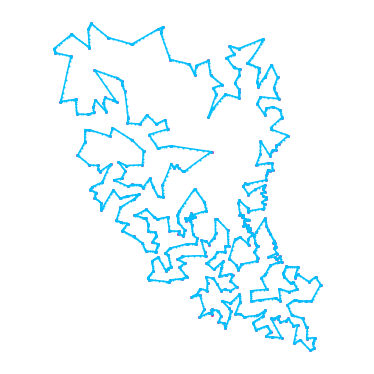

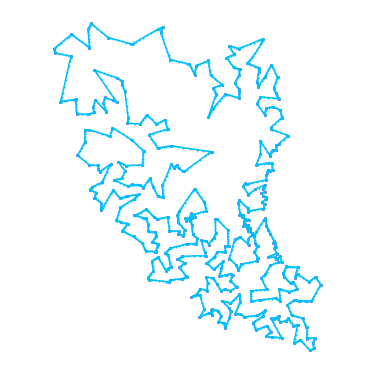

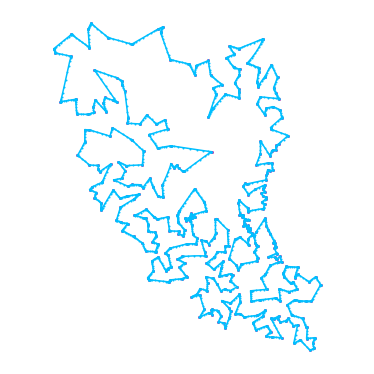

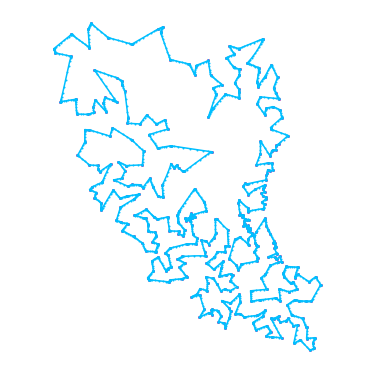

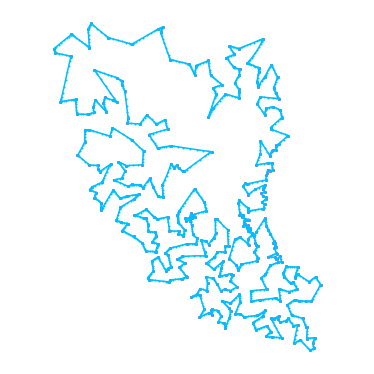

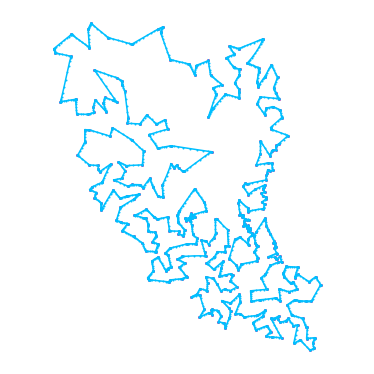

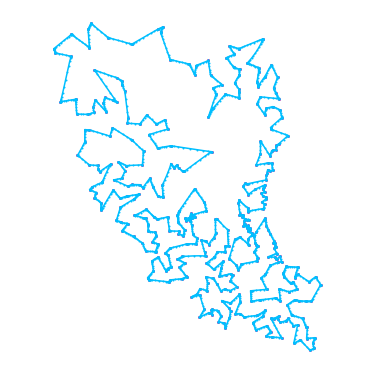

finished process at: 27765


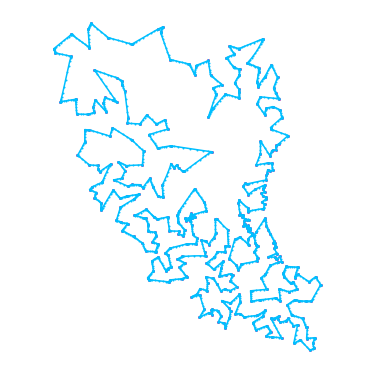

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


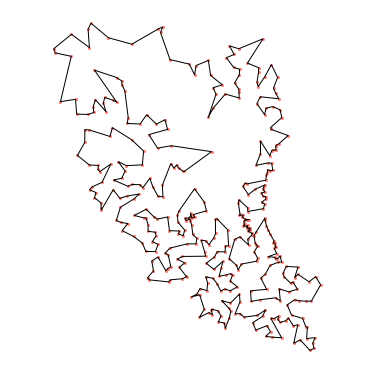

           x        y  winner
186  35.9619  50.6800       2
80   35.9522  50.6075       8
171  35.7256  50.3661      18
298  35.7669  50.0578      26
365  35.3056  50.4992      36
..       ...      ...     ...
49   35.7247  50.9883    4110
81   35.7631  50.9172    4116
3    35.8327  50.9915    4124
66   35.8622  50.8717    4132
106  35.7283  50.8133    4142

[415 rows x 3 columns]
len route = 195.95384020864333


In [ ]:
inp = df
it = 100000
learning_rate = 0.8

route = som(inp, it, learning_rate)
    
inp = inp.reindex(route) #because storage parameter has been altered and we rearrange it as shown
print(inp)
    
distance = route_cost(inp)

print('len route =', end = ' ')
print((distance))